In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets
X.shape, y.shape

((8124, 22), (8124, 1))

In [2]:
X.head().T

,0,1,2,3,4
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k
stalk-shape,e,e,e,e,t


In [3]:
# metadata
import json

print(json.dumps(mushroom.metadata, indent=2))

{
  "uci_id": 73,
  "name": "Mushroom",
  "repository_url": "https://archive.ics.uci.edu/dataset/73/mushroom",
  "data_url": "https://archive.ics.uci.edu/static/public/73/data.csv",
  "abstract": "From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible",
  "area": "Biology",
  "tasks": [
    "Classification"
  ],
  "characteristics": [
    "Multivariate"
  ],
  "num_instances": 8124,
  "num_features": 22,
  "feature_types": [
    "Categorical"
  ],
  "demographics": [],
  "target_col": [
    "poisonous"
  ],
  "index_col": null,
  "has_missing_values": "yes",
  "missing_values_symbol": "NaN",
  "year_of_dataset_creation": 1981,
  "last_updated": "Thu Aug 10 2023",
  "dataset_doi": "10.24432/C5959T",
  "creators": [],
  "intro_paper": null,
  "additional_info": {
    "summary": "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Fam

In [4]:
print(mushroom.metadata["additional_info"]["variable_info"])

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surfac

In [5]:
# variable information
print(mushroom.variables)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [6]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [7]:
import pandas as pd

In [8]:
df = pd.concat([X, y], axis="columns")
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [9]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.neural_network import MLPRegressor

In [10]:
hasher = FeatureHasher(n_features=100, input_type="string")


def preprocess(state, action):
    features = [f"{key}:{value}:{action}" for key, value in state.items()]
    return hasher.transform([features]).toarray()[0]

In [11]:
X_i = df.iloc[0, :-1]
preprocess(X_i, "eat")

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0., -1.,  0.,  0.,  0., -1.,  0., -1.,  1.,  0.,  0.,  0.,  0.,
        1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        1.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  1., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,
        0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [12]:
import random

actions = ["eat", "throw"]


def sample_pmf(pmf):
    total = sum(pmf)
    scale = 1 / total
    pmf = [v * scale for v in pmf]
    proba = random.random()
    total = 0
    for i, v in enumerate(pmf):
        total += v
        if total > proba:
            return i, total

In [13]:
from collections import defaultdict

total_reward = 0
avg_rewards = []
choices = defaultdict(int)

model = MLPRegressor()

for i, item in df.iterrows():
    X_i, y_i = item.iloc[:-1], item.iloc[-1]

    if i == 0:
        action_index = random.randint(0, 1)
    else:
        pmf = model.predict([list(preprocess(X_i, action)) for action in actions])
        action_index, prob = sample_pmf(pmf)
    action = actions[action_index]
    if action == "eat":
        reward = 0 if y_i == "p" else 1
        model.partial_fit([preprocess(X_i, action)], [reward])
    else:
        reward = 1 if y_i == "p" else 0
        model.partial_fit([preprocess(X_i, action)], [reward])
    choices[action + "_" + y_i] += 1
    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))

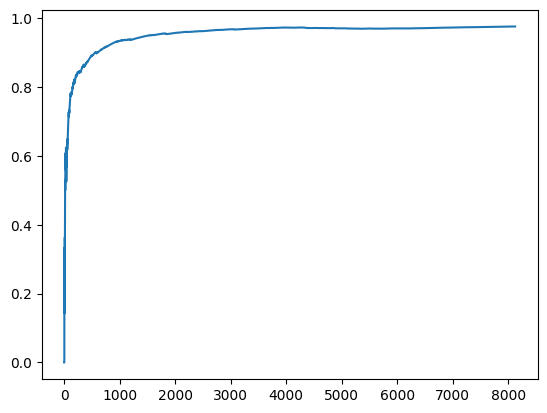

In [14]:
import matplotlib.pyplot as plt

n, _ = df.shape
plt.plot(range(n), avg_rewards)

In [15]:
total_reward

7935

In [16]:
choices

defaultdict(int, {'eat_p': 78, 'throw_e': 111, 'eat_e': 4097, 'throw_p': 3838})

In [17]:
df["poisonous"].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64